<a href="https://colab.research.google.com/github/shubham1262/Reco_Engine/blob/main/TF_Keras_Preprocessing_(pet_finder).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [ ]:
dataset_url = 'http://storage.googleapis.com/download.tensorflow.org/data/petfinder-mini.zip'
csv_file = 'datasets/petfinder-mini/petfinder-mini.csv'

tf.keras.utils.get_file('petfinder_mini.zip', dataset_url,
                        extract=True, cache_dir='.')
dataframe = pd.read_csv(csv_file)

1668792/1668792 [==============================] - 1s 0us/step


In [ ]:
dataframe.head(3)

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt,AdoptionSpeed
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100,Nibble is a 3+ month old ball of cuteness. He ...,1,2
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0,I just found it alone yesterday near my apartm...,2,0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,0,Their pregnant mother was dumped by her irresp...,7,3


In [ ]:
dataframe.dtypes

Type             object
Age               int64
Breed1           object
Gender           object
Color1           object
Color2           object
MaturitySize     object
FurLength        object
Vaccinated       object
Sterilized       object
Health           object
Fee               int64
Description      object
PhotoAmt          int64
AdoptionSpeed     int64
dtype: object

In [ ]:
dataframe['label']=np.where(dataframe['AdoptionSpeed']==4,0,1)

In [ ]:
dataframe.drop(columns=['Description','AdoptionSpeed'], inplace=True)

In [ ]:
df=dataframe

## Unique values for object data type

In [ ]:
def unq(df):
    for columns in df:
        if(df[columns].dtypes=='object'):
            print(f'{columns}: {df[columns].unique()}')
unq(df)

Type: ['Cat' 'Dog']
Breed1: ['Tabby' 'Domestic Medium Hair' 'Mixed Breed' 'Domestic Short Hair'
 'Domestic Long Hair' 'Terrier' 'Persian' 'Rottweiler'
 'Jack Russell Terrier' 'Shih Tzu' 'Labrador Retriever' 'Silky Terrier'
 'Bombay' 'Husky' 'Schnauzer' 'Golden Retriever' 'Siberian Husky' 'Collie'
 'German Shepherd Dog' 'Siamese' 'Calico' 'American Staffordshire Terrier'
 'Turkish Van' 'Doberman Pinscher' 'Oriental Short Hair' 'Beagle'
 'Ragdoll' 'Cocker Spaniel' 'Poodle' 'Black Labrador Retriever' 'Bengal'
 'Shar Pei' 'Spitz' 'Birman' 'Belgian Shepherd Malinois'
 'American Shorthair' 'Belgian Shepherd Laekenois' '0'
 'Jack Russell Terrier (Parson Russell Terrier)' 'Shepherd' 'Corgi'
 'Pit Bull Terrier' 'Oriental Tabby' 'Miniature Pinscher' 'Manx' 'Boxer'
 'Dachshund' 'Chihuahua' 'Snowshoe' 'Rat Terrier' 'Tiger' 'Silver'
 'Maine Coon' 'German Pinscher' 'Russian Blue' 'Tuxedo' 'Lhasa Apso'
 'Pomeranian' 'Whippet' 'English Bulldog' 'Bull Terrier'
 'Yellow Labrador Retriever' 'Dalmatian'
 

## Unique value for integer categories

In [ ]:
int_categories=['Age','Fee','PhotoAmt']
for i in df.columns:
  if(i in int_categories):
    print(i,df[i].unique())

Age [  3   1   4  12   2  78   6   8  10  36  14   5  72  60  24   9  48  62
  47  19 120   7  17  22  16  13  11  37  18  55  20  28  74  53  25  84
  76  30 132   0  96  46  15  50  56  54  92  29  27  49  44 144  21  31
  41  51  65  34 135  39  52  23  42 108  81  26  38  69 212  33  75  95
  80  63  61 255  89  32  91  35 117  73 122 123  64  87 112 156  66  67
  77 180  82  86  40  57 168 102  45 147  68  85  88 238 100]
Fee [ 100    0  150  300   50   10    1   30  750  400   80   20  250  200
  120  500   15    5  350    8    9  550   90  110  220   70   89  280
   40  600   38 1000   60  180   25   65  700  170  480  155  450   48
  299  160  688  270  650   99   35   45  210  188  380  108  390   59
   88  800  235 2000  599  125  499   75  190]
PhotoAmt [ 1  2  7  8  3  6  0 19 11  5  4 13 18 12 10  9 24 14 15 23 28 20 27 26
 16 30 29 22 25 21 17]


In [ ]:
x=df.drop(columns=['label'])
y=df['label']

## Train Test Val Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.25, random_state=1)

In [ ]:
print('Train Length: ',len(x_train))
print('Test Length: ',len(x_test))
print('Val Length: ',len(x_val))

Train Length:  6921
Test Length:  2308
Val Length:  2308


## Creating TF Dataset

In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  df = dataframe.copy()
  labels = df.pop('label')
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

### Preprocessing using tf.keras.layers

####String
- StringLookup, This will represent string categorical values as integers (uses adapt): https://www.tensorflow.org/api_docs/python/tf/keras/layers/StringLookup
- TextVectorization, This will clean up the data (language) (uses adapt): https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization

####Integer
- Normalization layer to normalize continous columns : https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization
- IntegerLookup, To represent as one-hot, multi-hot encoding (uses adapt)
- CategoryEncoding, To represent integer categorical values as one-hot or multi-hot, when size of vocab is known https://www.tensorflow.org/api_docs/python/tf/keras/layers/CategoryEncoding


### 1. Normalizer

In [ ]:
def get_normalization_layer(name, dataset):
  # Create a Normalization layer for the feature.
  normalizer = tf.keras.layers.Normalization(axis=None)

  # Prepare a Dataset that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

### 2. Category Encoding

In [ ]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  if dtype == 'string':
    index = tf.keras.layers.StringLookup(max_tokens=max_tokens)
  else:
    index = tf.keras.layers.IntegerLookup(max_tokens=max_tokens)

  feature_ds = dataset.map(lambda x, y: x[name])

  index.adapt(feature_ds)

  encoder = tf.keras.layers.CategoryEncoding(num_tokens=index.vocabulary_size())

  # layer, so you can use them, or include them in the Keras Functional model later.
  return lambda feature: encoder(index(feature))

In [ ]:
batch_size=256
tf_train=df_to_dataset(pd.concat([x_train,y_train],axis=1),batch_size=batch_size)
tf_test=df_to_dataset((pd.concat([x_test,y_test],axis=1)),shuffle=False, batch_size=batch_size)
tf_val=df_to_dataset((pd.concat([x_val,y_val],axis=1)),shuffle=False, batch_size=batch_size)

<ipython-input-169-f24fb8add9f8>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}


- Normalization of continous columns

In [ ]:
all_inputs = []
encoded_features = []

# Numerical features.
for header in ['PhotoAmt', 'Fee']:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, tf_train)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

- One hot encoding of interger category

In [ ]:
age_col = tf.keras.Input(shape=(1,), name='Age', dtype='int64')

encoding_layer = get_category_encoding_layer(name='Age',
                                             dataset=tf_train,
                                             dtype='int64',
                                             max_tokens=5)
encoded_age_col = encoding_layer(age_col)
all_inputs.append(age_col)
encoded_features.append(encoded_age_col)

- Encoding of categorical columns

In [ ]:
categorical_cols = ['Type', 'Color1', 'Color2', 'Gender', 'MaturitySize',
                    'FurLength', 'Vaccinated', 'Sterilized', 'Health', 'Breed1']

for header in categorical_cols:
  categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='string')
  encoding_layer = get_category_encoding_layer(name=header,
                                               dataset=tf_train,
                                               dtype='string',
                                               max_tokens=5)
  encoded_categorical_col = encoding_layer(categorical_col)
  all_inputs.append(categorical_col)
  encoded_features.append(encoded_categorical_col)

# Create, compile, and train the model
- merge the list of feature inputs—encoded_features—into one vector


In [ ]:
all_features = tf.keras.layers.concatenate(encoded_features)

In [ ]:
all_features

<KerasTensor: shape=(None, 48) dtype=float32 (created by layer 'concatenate')>

In [ ]:
x = tf.keras.layers.Dense(32, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(all_inputs, output)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

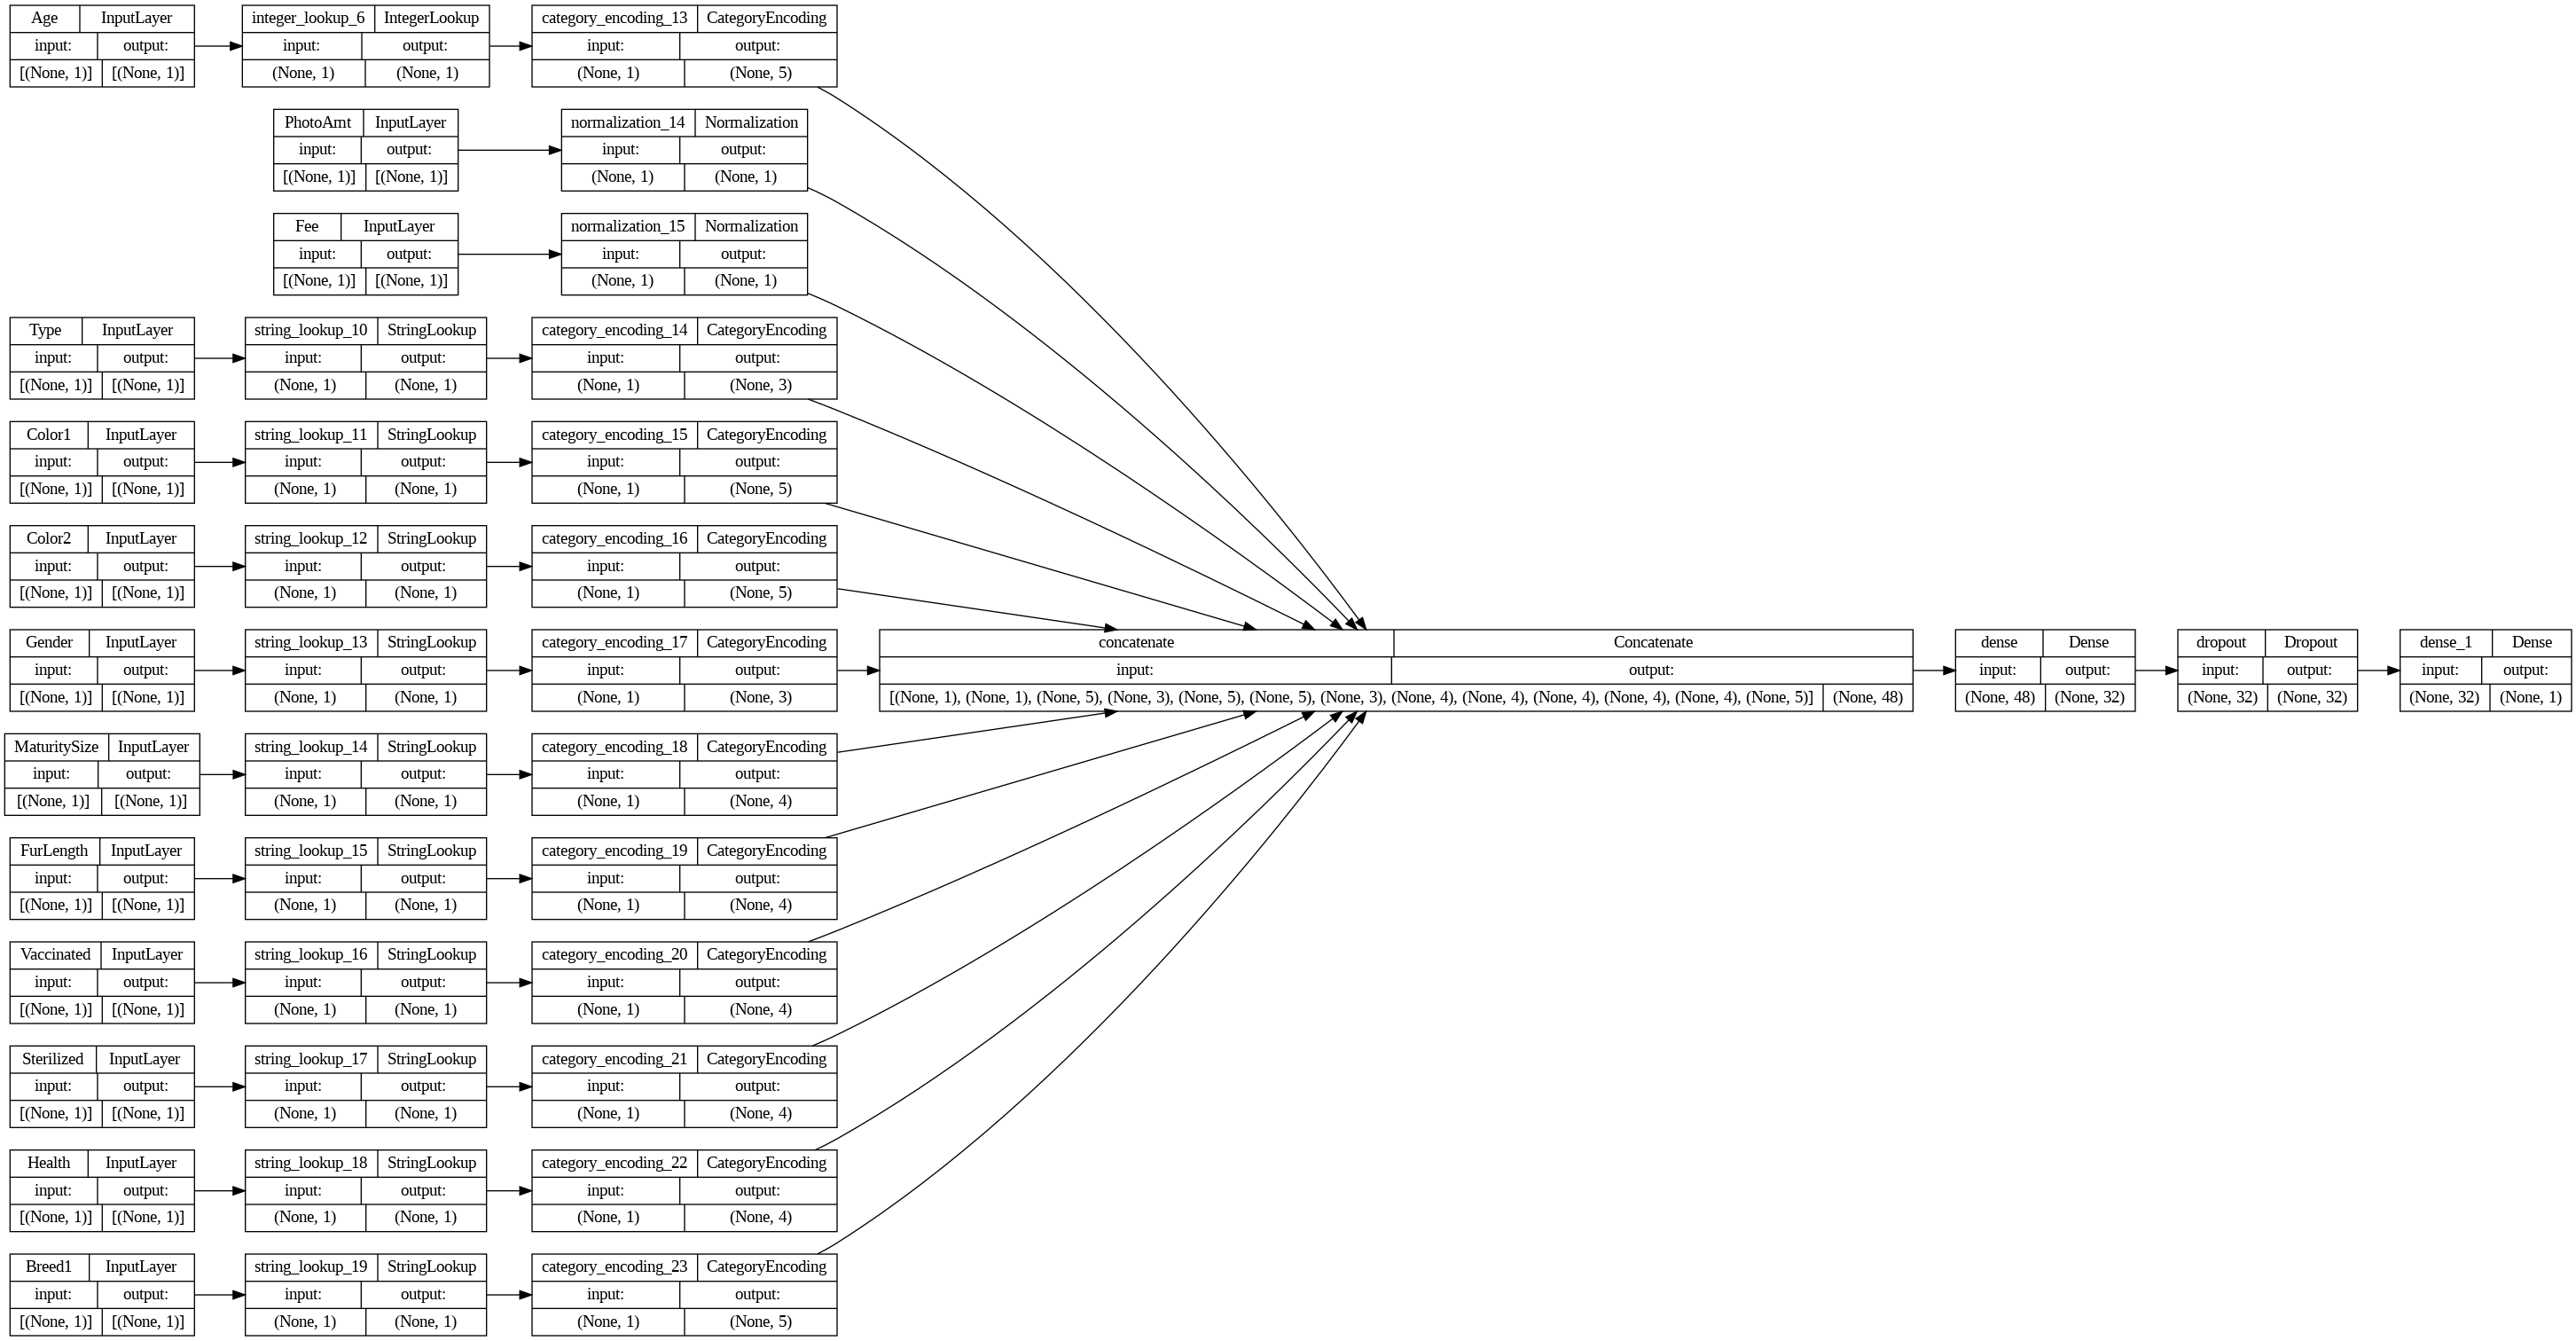

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [ ]:
model.fit(tf_train, epochs=10, validation_data=tf_val)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:566: UserWarning: Input dict contained keys ['label'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


28/28 [==============================] - 2s 23ms/step - loss: 0.6445 - accuracy: 0.5368 - val_loss: 0.5672 - val_accuracy: 0.7019
Epoch 2/10
28/28 [==============================] - 0s 7ms/step - loss: 0.5904 - accuracy: 0.6515 - val_loss: 0.5475 - val_accuracy: 0.7283
Epoch 3/10
28/28 [==============================] - 0s 7ms/step - loss: 0.5710 - accuracy: 0.6703 - val_loss: 0.5367 - val_accuracy: 0.7396
Epoch 4/10
28/28 [==============================] - 0s 8ms/step - loss: 0.5612 - accuracy: 0.6798 - val_loss: 0.5291 - val_accuracy: 0.7409
Epoch 5/10
28/28 [==============================] - 0s 6ms/step - loss: 0.5515 - accuracy: 0.6911 - val_loss: 0.5242 - val_accuracy: 0.7331
Epoch 6/10
28/28 [==============================] - 0s 6ms/step - loss: 0.5419 - accuracy: 0.6985 - val_loss: 0.5196 - val_accuracy: 0.7361
Epoch 7/10
28/28 [==============================] - 0s 6ms/step - loss: 0.5426 - accuracy: 0.7011 - val_loss: 0.5166 - val_accuracy: 0.7396
Epoch 8/10
28/28 [============

In [ ]:
loss, accuracy = model.evaluate(tf_test)

10/10 [==============================] - 0s 5ms/step - loss: 0.5180 - accuracy: 0.7370


In [ ]:
sample = {
    'Type': 'Cat',
    'Age': 3,
    'Breed1': 'Tabby',
    'Gender': 'Male',
    'Color1': 'Black',
    'Color2': 'White',
    'MaturitySize': 'Small',
    'FurLength': 'Short',
    'Vaccinated': 'No',
    'Sterilized': 'No',
    'Health': 'Healthy',
    'Fee': 100,
    'PhotoAmt': 2,
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = model.predict(input_dict)

1/1 [==============================] - 0s 470ms/step


In [ ]:
prob = tf.nn.sigmoid(predictions[0])
print(
    "This particular pet had a %.1f percent probability "
    "of getting adopted." % (100 * prob)
)

This particular pet had a 76.4 percent probability of getting adopted.
